<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/MLU.jpg" alt="Drawing" style="width:1700px;">



# <center> **08. Retaking and Understanding Machine learning!** </center>

## **Outline**

[1. **Classification Boundaries**](#topic1)

[2. **Overfitting and underfitting**](#topic2)

[3. **Working with feature representation: PCA**](#topic3)

In [2]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [3]:
#@title **2. LOAD LIB** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.datasets import *
from sklearn.model_selection import KFold
from sklearn.metrics import *
%run -i code/utils.py

Graphviz already installed


# **0. Retaken Classification and Regression** <a name="topic1"></a>

- In **supervised problems** we have features ($\mathbf{X}$) and labels ($y$).
- We have used sklearn framework to implement different models. 
- We should split data to properly train models. We have seen: 
    - Train - test (we can use: `train_test_split`)
    - Kfod cross validation (we can use `cross_val_score`)

## **Classification**

  - NGB. Naive Gaussian Bayes. 
  - DT. Decision Tree. 
  - RF. Random Forest classifier
  - SVC. Suport Vector Machine. 
  - and there are many more ...

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- Use every classfier to acess on **breast** cancer dataset, using a train-test split (80-20), but also using a kfold-cross validation, with K=10. 

- Report the results. 




mean radius  mean texture  ...  worst fractal dimension  diagnosis
0        17.99         10.38  ...                  0.11890        0.0
1        20.57         17.77  ...                  0.08902        0.0

[2 rows x 31 columns]

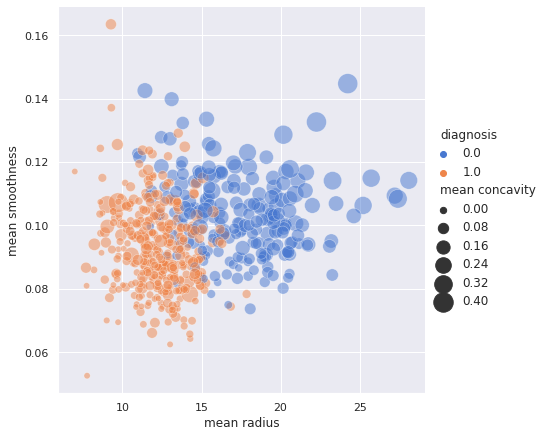

In [5]:
#@title **Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()


cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

In [ ]:
#Implement Here!

## **Regression**

- Decision tree regressor
- Random forest regressor
- Suppor vector machine regressor
- and there are many more ...

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Explore **DIABETES** dataset with every regressor explained in class. Use a train-test (90-10) and a kfold validation with K=15

- How is the performance of the implemented methods?


age       sex       bmi        bp  ...        s4        s5        s6  target
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646   151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204    75.0
2  0.085299  0.050680  0.044451 -0.005671  ... -0.002592  0.002864 -0.025930   141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022692 -0.009362   206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031991 -0.046641   135.0
5 -0.092695 -0.044642 -0.040696 -0.019442  ... -0.076395 -0.041180 -0.096346    97.0
6 -0.045472  0.050680 -0.047163 -0.015999  ... -0.039493 -0.062913 -0.038357   138.0
7  0.063504  0.050680 -0.001895  0.066630  ...  0.017703 -0.035817  0.003064    63.0
8  0.041708  0.050680  0.061696 -0.040099  ... -0.002592 -0.014956  0.011349   110.0
9 -0.070900 -0.044642  0.039062 -0.033214  ... -0.002592  0.067736 -0.013504   310.0

[10 rows x 11 columns]

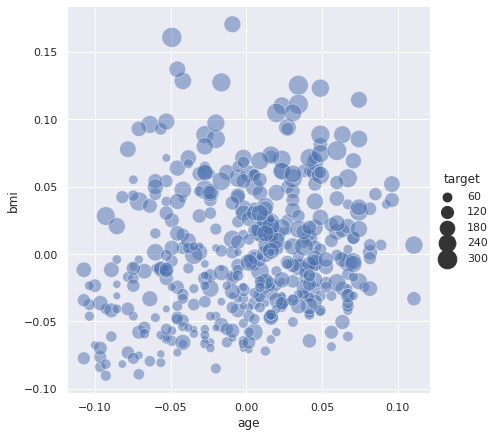

In [6]:
#@title **code**
import numpy as np
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes()


variable_x = "age" #@param {type:"string"}
variable_y = "bmi" #@param {type:"string"}
variable_s = "target" #@param {type:"string"}


pandas_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
pandas_diabetes["target"] =  pd.Series(diabetes.target)


sns.relplot(x=variable_x, y=variable_y, size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=pandas_diabetes)


pandas_diabetes.head(10)

In [ ]:
#Implement Here!

# **1. Classification Boundaries** <a name="topic1"></a>

Regarding the machine learning classification, we design, model and build strategies to separate train examples. In other words, separate samples means to create boundaries. According to the assumptions of each strategy, each model build different boundaries. 

Now, we can see how to separate examples. We are using a toy dataset, it is **generated everytime** by deafult. 

- Take a moment to see `make_moons` dataset. 

0.02s
0.03s
0.02s


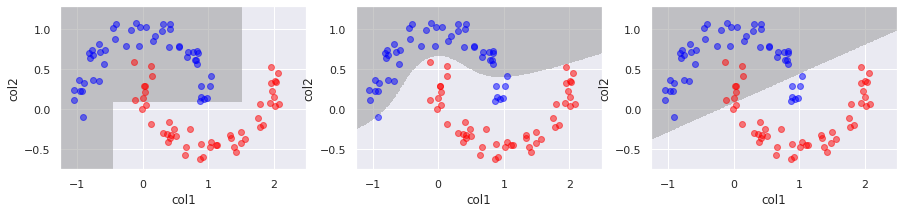

In [11]:
#@title **code** computing boundaries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time

dt = DecisionTreeClassifier(max_depth=2)
sv = SVC(kernel="poly",  degree=3, gamma=2)
lr = LogisticRegression()

estimators = [ dt, sv, lr ]

X,y = make_moons(100, noise=0.1)

plt.figure(figsize=(15,3))
for i, estimator in enumerate(estimators):
    plt.subplot(1,3,i+1)
    t0 = time.time()
    estimator.fit(X,y)
    plot_2Ddata_with_boundary(estimator.predict, X,y)
    t1 = time.time()
    print( ('%.2fs' % (t1 - t0)))
    plt.xlabel("col1"); plt.ylabel("col2")
    

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">


- change the `max_deph` on the decision tree to 1, to 3 or more and observe the decision tree it is generated
- change the kernel, degree and gamma parameter of the SVC.
- see **help** on each estimators to see available paramet


**How were built the boundaries?**

- from **Linear classifier** we lear the best parameters ($w_0, w_1$) that fix a line: $w_0 + X w_1$


In [9]:
print( "coefs", lr.coef_)

coefs [[ 1.08715696 -2.76148131]]


## **1.1 Decision Tree Classifier**

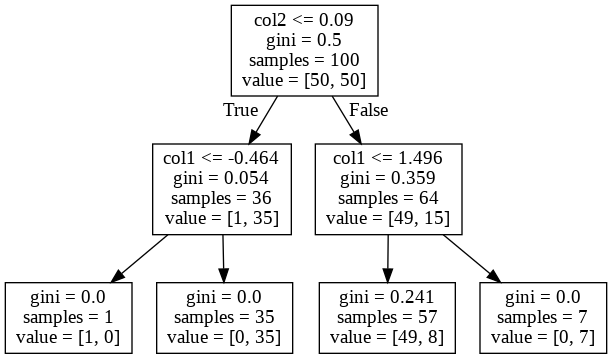

In [12]:
#@title **code** Boundaries from DT
from sklearn.tree import export_graphviz
from IPython.display import Image

export_graphviz(dt, out_file='dt.dot', feature_names=["col1", "col2"])
!dot -Tpng dt.dot > dt.png

Image(filename='dt.png') 

## **1.2 Support Vector Machine**

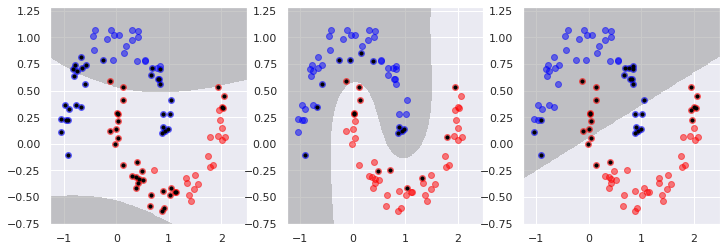

In [13]:
#@title **code** SVM with different kernels
plt.figure(figsize=(12,4))
sv1 = SVC(kernel="poly",  degree=2, gamma=1)
sv2 = SVC(kernel="rbf",  gamma=2)
sv3 = SVC(kernel="linear", gamma=1)
for i,sv in enumerate([sv1, sv2, sv3]):
    plt.subplot(1,3,i+1)
    sv.fit(X,y)
    plot_2Ddata_with_boundary(sv.predict, X,y)
    plt.scatter(sv.support_vectors_[:,0], sv.support_vectors_[:,1], color="black", s=10, alpha=1.)


# **2. Overfitting and underfitting** <a name="topic2"></a>


Let's supose now we have a noisier dataset. 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- what would be the "natural" classification boundary for this dataset?
- what accuracy would you expect to get?

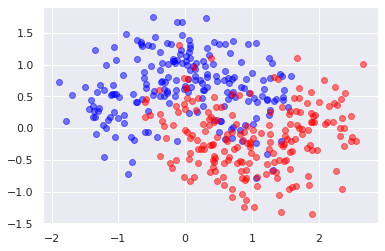

In [14]:
#@title **code** Noise dataset
X,y = make_moons(400, noise=0.4)
plot_2Ddata_with_boundary(None, X,y)

we now use a 50/50 random split to train and to test

In [17]:
#@title **code** to plot
def plot_train_test(estimator, Xtr, Xts, ytr, yts, alpha=.5):
    estimator.fit(Xtr,ytr)
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plot_2Ddata_with_boundary(estimator.predict, Xtr,ytr, alpha=alpha)
    plt.title("TRAIN accuracy %.3f"%estimator.score(Xtr, ytr))
    plt.subplot(122)
    plot_2Ddata_with_boundary(estimator.predict, Xts,yts, alpha=alpha)
    plt.title("TEST accuracy %.3f"%estimator.score(Xts, yts))


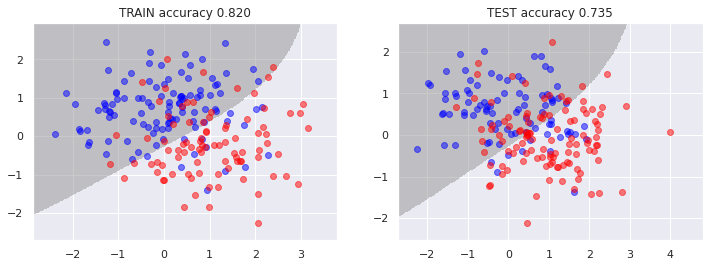

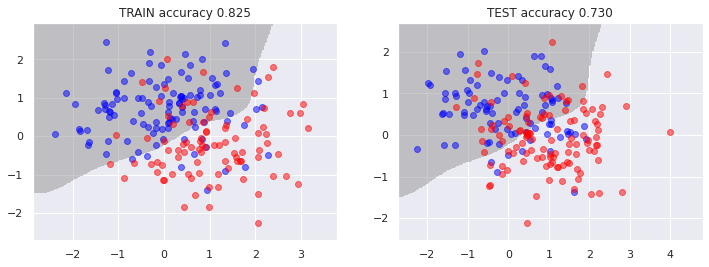

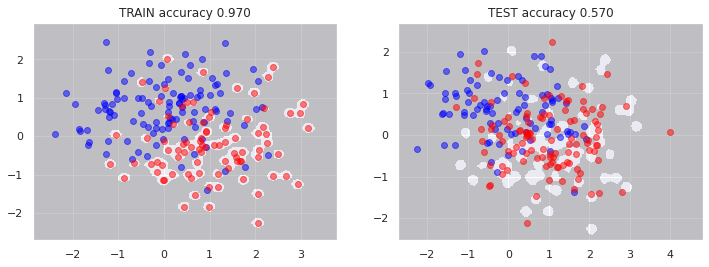

In [16]:
#@title **code** SVM with different hyperparameters
from sklearn.model_selection import train_test_split
X,y = make_moons(400, noise=0.7)
Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

plot_train_test(SVC(kernel="rbf",  gamma=.1), Xtr, Xts, ytr, yts)
plot_train_test(SVC(kernel="rbf",  gamma=1), Xtr, Xts, ytr, yts)
plot_train_test(SVC(kernel="rbf",  gamma=100), Xtr, Xts, ytr, yts)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Evaluate **overfitting and underfitting** examples over breast cancer dataset. 


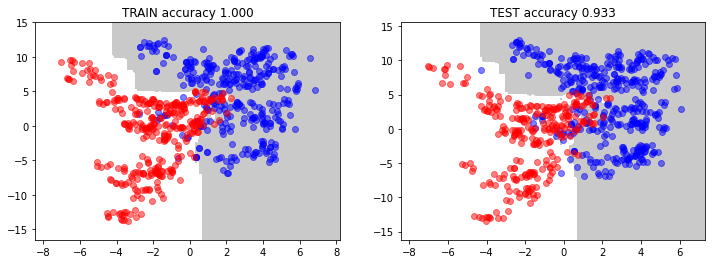

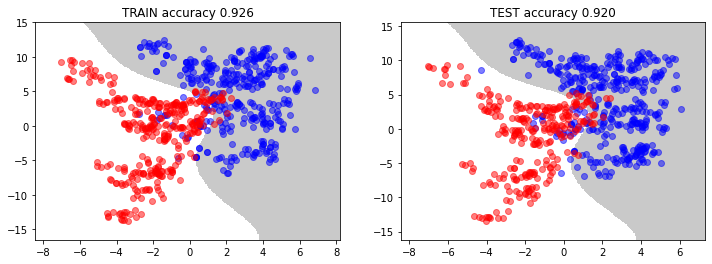

In [ ]:
# write code here!

# **3. Working with feature representation: PCA** <a name="topic3"></a>

Recall that GaussianNB did not perform so well from previous notes.

In [19]:
#@title **code** previous result from raw data
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, KFold

d = pd.read_csv("data/data_banknote_authentication.txt.gz")
X = d.values[:,:-1]
y = d.values[:,-1]
print ("X shape", X.shape)
s = cross_val_score(GaussianNB(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print( "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

X shape (1372, 4)
accuracy 0.840 (+/- 0.03379)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/PipelineImage.jpg" style="width:1000px;">


Now, we will work on **feature extraction** from a strategy named **P**rincipal **C**omponent **A**nalysis (**PCA**).

- PCA exploit and built correlation patterns between features.
- Find the directions of maximum variance and project data over this new axis. 

From next plot: 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/PCA.png" style="width:700px;">

Which features better represent the fish?


In [ ]:
X = d.values[:,:-1]
X = PCA(n_components=3).fit_transform(X)
print( "shape after PCA ", X.shape)
s = cross_val_score(GaussianNB(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

shape after PCA  (1372, 3)
accuracy 0.967 (+/- 0.01642)


## **3.1 Pipelines**

We can use a more sophisticated framework from `sklearn` to perform several steps at the same time. See how works the `Pipelines`

In [20]:
from sklearn.pipeline import Pipeline

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

p = Pipeline((("pca", PCA(n_components=3)), ("classifier", GaussianNB()) ))

p.fit(Xtr, ytr)

print ("TRAIN accuracy %.3f"%p.score(Xtr, ytr))
print ("TEST  accuracy %.3f"%p.score(Xts, yts))

TRAIN accuracy 0.968
TEST  accuracy 0.950


now with cross validation

In [21]:
s = cross_val_score(p, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.967 (+/- 0.01397)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

1. Try overfitting in other classification problem
2. How is the overfitting in bike regression dataset?. Try changing different parameteres
3. In pipeline adding quadratic features. What happenend?


---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
